In [8]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../')
import time
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2
from marcia import Sampler,Likelihood
from marcia import Data
from marcia import Cosmology as cosmo 

In [3]:
import numpy as np

In [4]:
l = Likelihood('LCDM',['H0','Omega_m','qso_sigma','qso_beta','qso_gamma'],['QSO_full'])

In [5]:
l.chisq_QSO_full([70,0.3,.2,8,0.6])

10800.487560284457

In [4]:
l = Sampler('LCDM',['H0','Omega_m','qso_sigma','qso_beta','qso_gamma'],['QSO_full', 'Pantheon_plus'],[70,0.3,.2,8,0.6],sampler_file='test.h5',max_n=500)

In [5]:
l.MLE()

Best-fit values: [74.80837725  0.3538656   0.22959557  6.39628481  0.66122977]
Max-Likelihood value (including prior likelihood): -668.0808637084609


array([74.80837725,  0.3538656 ,  0.22959557,  6.39628481,  0.66122977])

In [6]:
l.sampler(True)

Reseting sampling from iteration: 277


100%|██████████| 500/500 [11:30<00:00,  1.38s/it]


Autocorrelation time could not be calculated, increase the number of iterations
Burn-in: 0 and thin: 1[DEFAULT VALUES]


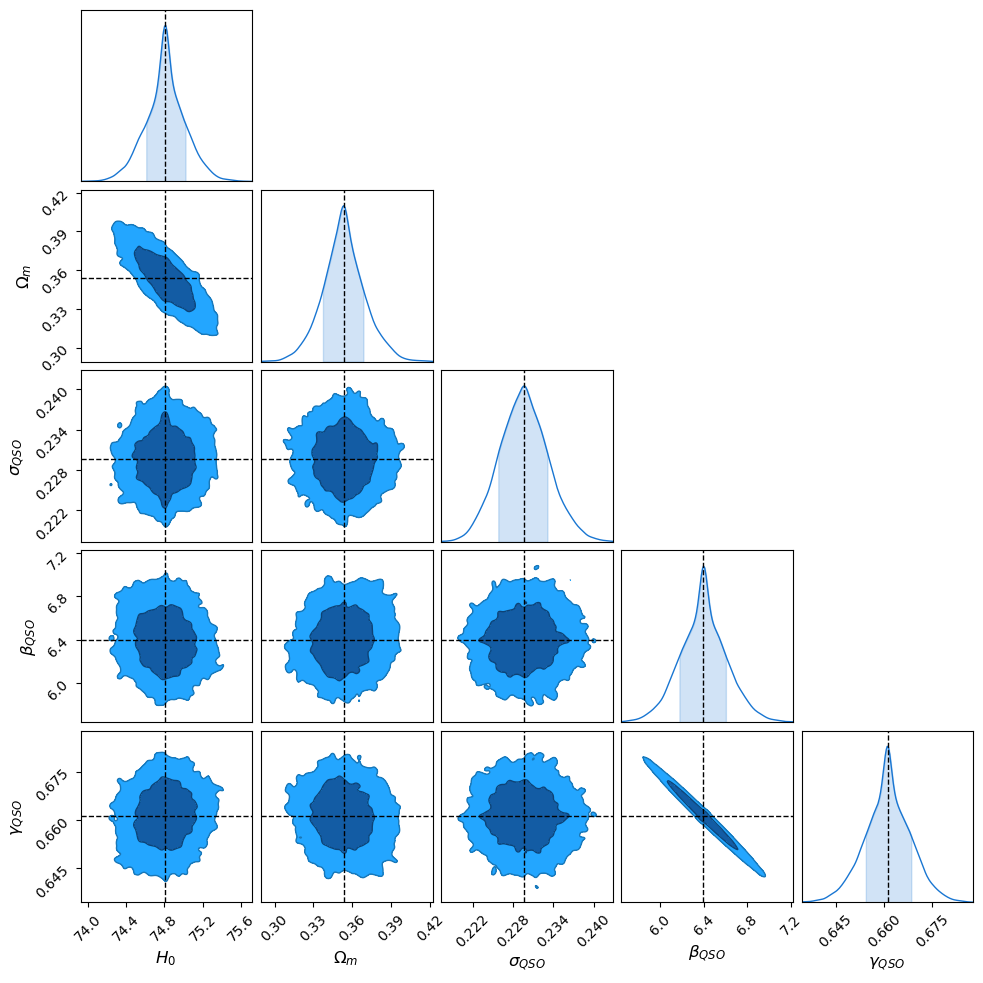

In [9]:
l.corner_plot()

In [19]:
Samp = Sampler('LCDM',['H0','Omega_m','qso_sigma','M_b'],['QSA','Pantheon_plus'],[70,0.25,5,-19.2],sampler_file='QSA_LCDM.h5',max_n=1000)

In [20]:
Samp.sampler(reset=True)

Reseting sampling from iteration: 1000
Sampling begins


Best-fit values: [ 61.26339077   0.3199715   10.         -19.63641226]
Max-Likelihood value (including prior likelihood): -7536.583215076875


  0%|          | 0/1000 [00:00<?, ?it/s]/home/anto/Softwares/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 1000/1000 [12:52<00:00,  1.29it/s]


Autocorrelation time could not be calculated, increase the number of iterations
Burn-in: 0 and thin: 1[DEFAULT VALUES]


array([ 61.26339077,   0.3199715 ,  10.        , -19.63641226])

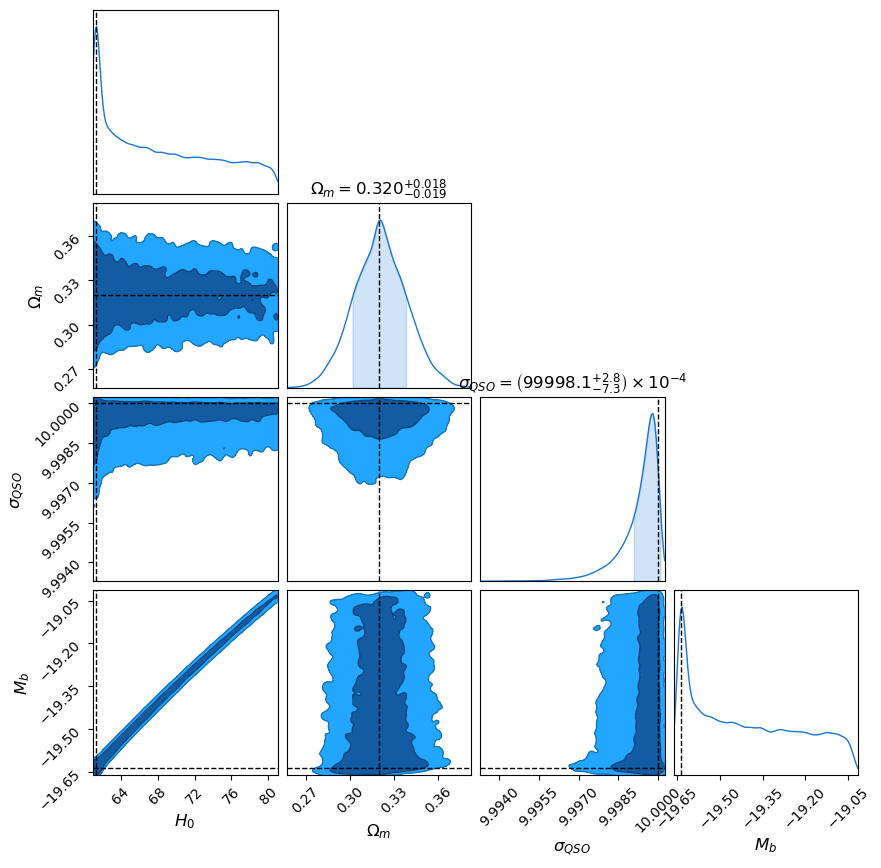

In [22]:
Samp.corner_plot()
Samp.MLE()

In [17]:
data =[ 'Pantheon_plus']
db = Data(data)

cmb_z, mb, covariance = db.get_pantheon_plus()
helio_z = db.get_pantheon_plus(Zhel=True)

plt.plot(cmb_z,mb,'o')

Best-fit values: [75.0530695   0.33153695]
Max-Likelihood value (including prior likelihood):-701.4612684650086


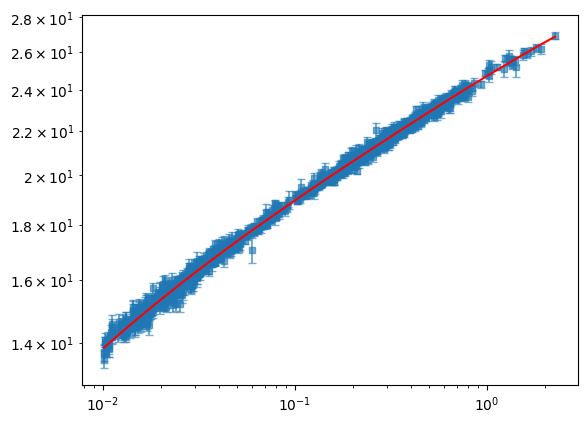

In [46]:
plt.xscale('log')
plt.yscale('log')
plt.errorbar(cmb_z,mb,yerr=np.sqrt(np.diag(covariance)),  markersize=5, alpha=0.6, capsize=3, fmt = 's')
plt.plot(cmb_z, Samp.likelihood.theory.distance_modulus(Samp.MLE(verbose=True),cmb_z, helio_z), 'r-', zorder = 10)
plt.show()

In [23]:
%matplotlib inline